In [1]:
import numpy as np
# scipy.special for the sigmoid function expit() 
import scipy.special 

#for MNIST plotting
import matplotlib.pyplot 
%matplotlib inline

In [2]:
#neural network class definition
class neuralNetwork():

  #initialize the neural network
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):

    #set number of nodes into input, hidden and output layers
    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes

    # link weight matrices, wih and who 
    # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer 
    # w11 w21 
    # w12 w22 etc 
    self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes)) 
    self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes)) 

    #learning rate
    self.lr = learningrate 

    # activation function is the sigmoid function 
    self.activation_function = lambda x: scipy.special.expit(x) 

    pass

  #train the neural network
  def train(self, inputs_list, targets_list):
    # convert inputs list to 2d array 
    inputs = np.array(inputs_list, ndmin=2).T 
    targets = np.array(targets_list, ndmin=2).T 
 
    # calculate signals into hidden layer 
    hidden_inputs = np.dot(self.wih, inputs) 
    
    # calculate the signals emerging from hidden layer 
    hidden_outputs = self.activation_function(hidden_inputs) 
 
    # calculate signals into final output layer 
    final_inputs = np.dot(self.who, hidden_outputs) 
 
    # calculate the signals emerging from final output layer 
    final_outputs = self.activation_function(final_inputs) 

    # output layer error is the (target - actual) 
    output_errors = targets - final_outputs 
 
    # hidden layer error is the output_errors, split by weights, recombined at hidden nodes 
    hidden_errors = np.dot(self.who.T, output_errors) 
 
    # update the weights for the links between the hidden and output layers 
    self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs)) 
 
    # update the weights for the links between the input and hidden layers 
    self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs)) 

    pass


  #query the neural network
  def query(self,input_list):
    # convert inputs list to 2d array 
    inputs = np.array(input_list, ndmin=2).T 
 
    # calculate signals into hidden layer 
    hidden_inputs = np.dot(self.wih, inputs) 
    
    # calculate the signals emerging from hidden layer 
    hidden_outputs = self.activation_function(hidden_inputs) 
 
    # calculate signals into final output layer 
    final_inputs = np.dot(self.who, hidden_outputs) 
    
    # calculate the signals emerging from final output layer 
    final_outputs = self.activation_function(final_inputs) 
 
    return final_outputs 

In [3]:
data_file = open("mnist_train.csv", 'r') 
data_list = data_file.readlines() 
data_file.close()

Plotting the digits

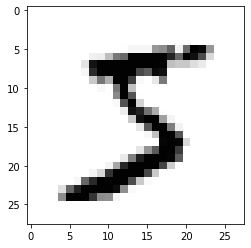

In [4]:
all_values = data_list[0].split(',') 
image_array = np.asfarray(all_values[1:]).reshape((28,28)) 
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None') 

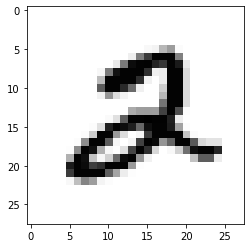

In [5]:
all_values = data_list[5].split(',') 
image_array = np.asfarray(all_values[1:]).reshape((28,28)) 
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None') 

In [15]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
#print(scaled_input)

In [7]:
#output nodes is 10 (example)
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [19]:
# number of input, hidden and output nodes 
input_nodes = 784 
hidden_nodes = 250 
output_nodes = 10 

# learning rate is 0.3 
learning_rate = 0.3 

# create instance of neural network 
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate) 

# load the mnist training data CSV file into a list 
training_data_file = open("mnist_train.csv", 'r') 
training_data_list = training_data_file.readlines() 
training_data_file.close() 

# train the neural network 
# go through all records in the training data set 
for record in training_data_list: 
 
 # split the record by the ',' commas 
 all_values = record.split(',') 
 
 # scale and shift the inputs 
 inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
 
 # create the target output values (all 0.01, except the desired label which is 0.99) 
 targets = np.zeros(output_nodes) + 0.01 
 
 # all_values[0] is the target label for this record 
 targets[int(all_values[0])] = 0.99 
 n.train(inputs, targets) 
 pass

In [9]:
#load the mnist test data CSV file into a list 
test_data_file = open("mnist_test.csv", 'r') 
test_data_list = test_data_file.readlines() 
test_data_file.close() 

In [20]:
# test the neural network 

# scorecard for how well the network performs, initially empty 
scorecard = [] 

# go through all the records in the test data set 
for record in test_data_list: 
 
 # split the record by the ',' commas 
 all_values = record.split(',') 
 
 # correct answer is first value 
 correct_label = int(all_values[0]) 
 #print(correct_label, "correct label") 
 
 # scale and shift the inputs 
 inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
 
 # query the network 
 outputs = n.query(inputs) 
 
 # the index of the highest value corresponds to the label 
 label = np.argmax(outputs) 
 #print(label, "network's answer") 
 
 # append correct or incorrect to list 
 if (label == correct_label): 
   # network's answer matches correct answer, add 1 to scorecard 
   scorecard.append(1) 
 
 else: 
   # network's answer doesn't match correct answer, add 0 to scorecard 
   scorecard.append(0) 
 pass 
 
pass

In [21]:
# calculate the performance score, the fraction of correct answers
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9514
